In [1]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
from matplotlib.lines import Line2D
from population_graph import construct_PopulationGraph
from community_detection import detect_communities

In [37]:
iteration = 2
PhenoGraph_k =  100
size_smallest_cluster = 10

In [38]:
SoftWL_dict= pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel",
            "Danenberg",
            "Cohort_1",
            "SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            + ".pkl",
        ),
        "rb",
    ),
)
Patient_IDs = SoftWL_dict["Patient_id"]
Gram_matrix = SoftWL_dict["Gram_matrix"]
Histograms = SoftWL_dict["Histogram"]


### Complete_graph

In [39]:
PopulationGraph_type = 'complete_graph'
G_population = construct_PopulationGraph(
    Gram_matrix,
    PopulationGraph_type,
    PhenoGraph_k,
)
Community_ids = detect_communities(G_population, size_smallest_cluster)



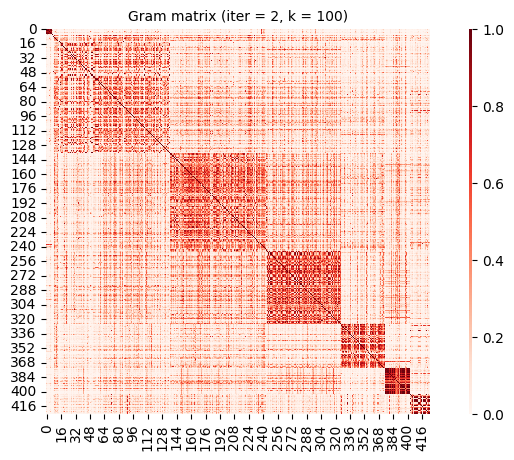

In [40]:
Patient_indices_sorted_by_community = np.argsort(Community_ids)
Gram_matrix_reorder = Gram_matrix[Patient_indices_sorted_by_community, :][:, Patient_indices_sorted_by_community]
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5.5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Gram_matrix_reorder,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
    )

ax.set_title(f"Gram matrix (iter = {iteration}, k = {PhenoGraph_k})", fontsize=10)
plt.show()

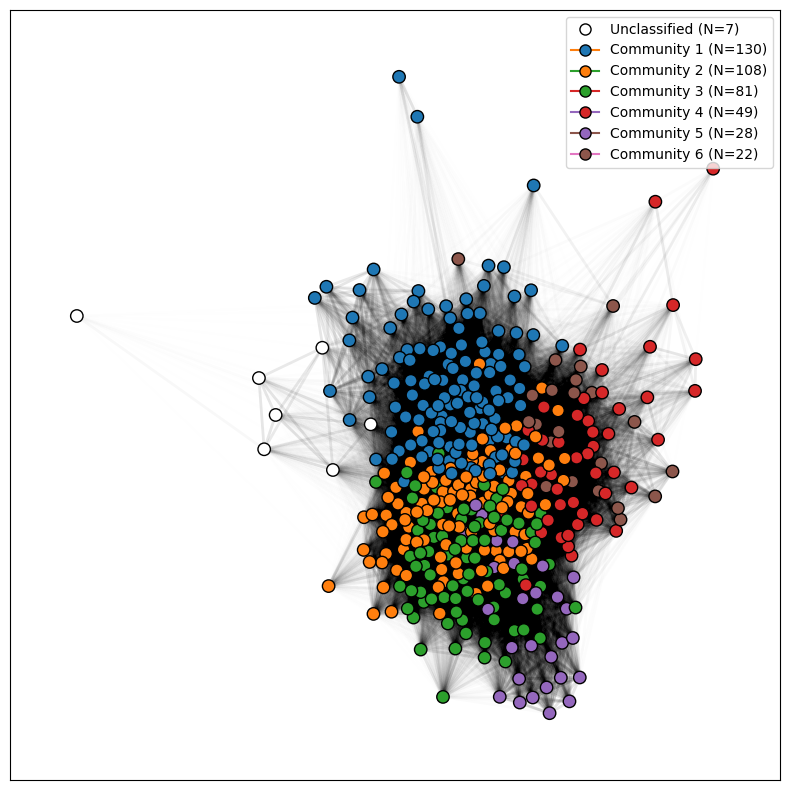

In [41]:
color_palette = ["white"] + sns.color_palette("tab10") + sns.color_palette("Set2")
pos = nx.spring_layout(G_population, seed=2, k=1 / np.sqrt(682) * 5, iterations=100)
fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)
edge_list = list(G_population.edges())
edge_alpha = [
        0.1 * G_population[u][v]["weight"] if G_population[u][v]["weight"] > 0 else 0 for u, v in edge_list
    ]
nx.draw_networkx_edges(G_population, pos, alpha=edge_alpha, width=2)
nx.draw_networkx_nodes(
            G_population, pos, node_size=80, 
            node_color=[color_palette[int(i)] for i in Community_ids], 
            edgecolors="black"
        )
handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[0],
        label=f"Unclassified (N={np.sum(Community_ids == 0)})",
        markerfacecolor=color_palette[0],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
]
for i in range(1, len(np.unique(Community_ids))):
    patch = Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[i + 1],
        label=f"Community {i} (N={np.sum(Community_ids == i)})",
        markerfacecolor=color_palette[i],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
    handles.append(patch)
ax.legend(handles=handles)
plt.show()

### Complete_graph (with weak edges removed)

In [25]:
PopulationGraph_type = 'complete_graph_with_weak_edges_removed'
para_dict = {
    'weight_threshold_percentile': 95,
}
G_population = construct_PopulationGraph(
    Gram_matrix,
    PopulationGraph_type,
    para_dict = para_dict,
)
Community_ids = detect_communities(G_population, size_smallest_cluster)


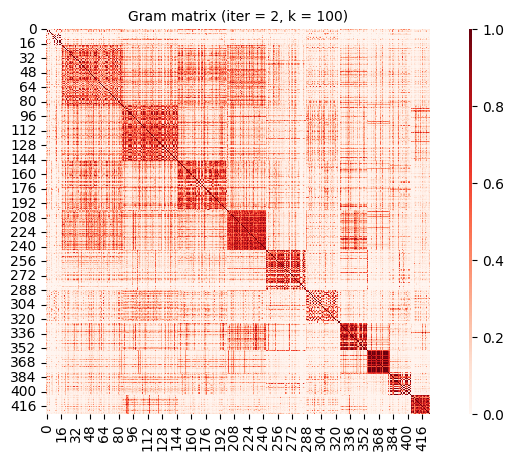

In [29]:
Patient_indices_sorted_by_community = np.argsort(Community_ids)
Gram_matrix_reorder = Gram_matrix[Patient_indices_sorted_by_community, :][:, Patient_indices_sorted_by_community]
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5.5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Gram_matrix_reorder,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
    )

ax.set_title(f"Gram matrix (iter = {iteration}, k = {PhenoGraph_k})", fontsize=10)
plt.show()

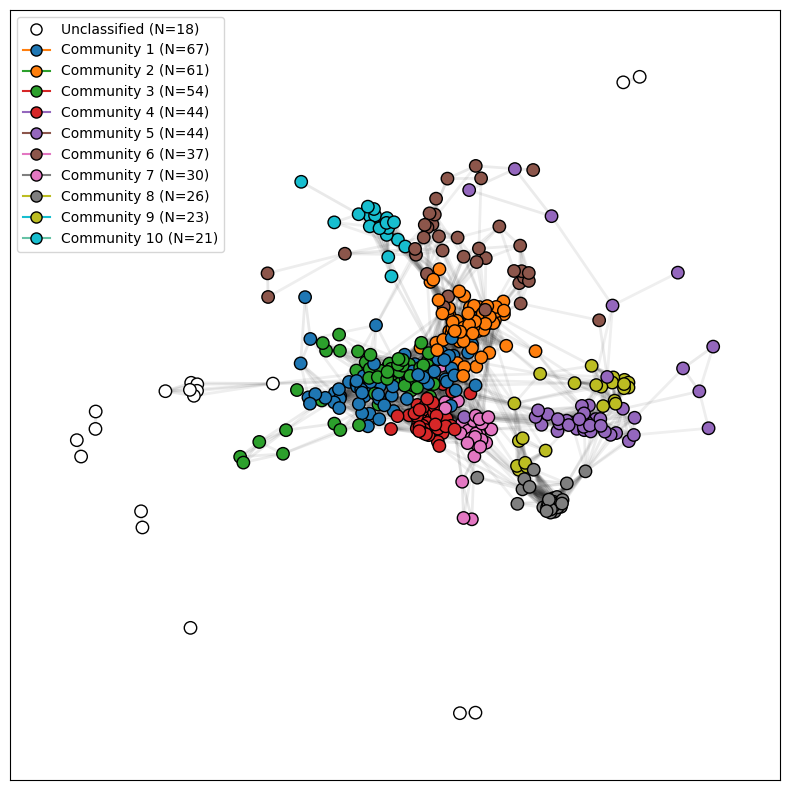

In [24]:
color_palette = ["white"] + sns.color_palette("tab10") + sns.color_palette("Set2")
pos = nx.spring_layout(G_population, seed=2, k=1 / np.sqrt(682) * 5, iterations=100)
fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)
edge_list = list(G_population.edges())
edge_alpha = [
        0.1 * G_population[u][v]["weight"] if G_population[u][v]["weight"] > 0 else 0 for u, v in edge_list
    ]
nx.draw_networkx_edges(G_population, pos, alpha=edge_alpha, width=2)
nx.draw_networkx_nodes(
            G_population, pos, node_size=80, 
            node_color=[color_palette[int(i)] for i in Community_ids], 
            edgecolors="black"
        )
handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[0],
        label=f"Unclassified (N={np.sum(Community_ids == 0)})",
        markerfacecolor=color_palette[0],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
]
for i in range(1, len(np.unique(Community_ids))):
    patch = Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[i + 1],
        label=f"Community {i} (N={np.sum(Community_ids == i)})",
        markerfacecolor=color_palette[i],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
    handles.append(patch)
ax.legend(handles=handles)
plt.show()

### KNN graph

In [34]:
PopulationGraph_type = 'knn_graph'
para_dict = {
    'knn_k': 30,
}
G_population = construct_PopulationGraph(
    Gram_matrix,
    PopulationGraph_type,
    para_dict = para_dict,
)
Community_ids = detect_communities(G_population, size_smallest_cluster)


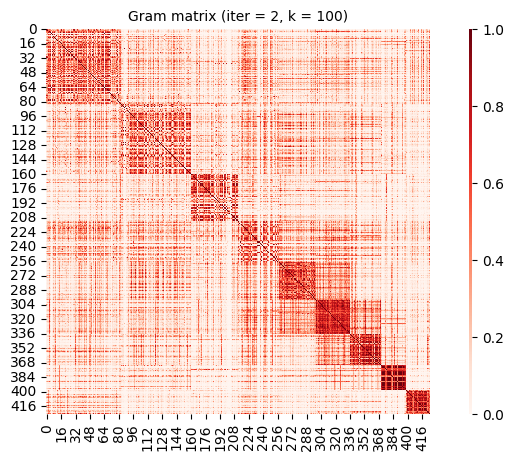

In [35]:
Patient_indices_sorted_by_community = np.argsort(Community_ids)
Gram_matrix_reorder = Gram_matrix[Patient_indices_sorted_by_community, :][:, Patient_indices_sorted_by_community]
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5.5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Gram_matrix_reorder,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
    )

ax.set_title(f"Gram matrix (iter = {iteration}, k = {PhenoGraph_k})", fontsize=10)
plt.show()

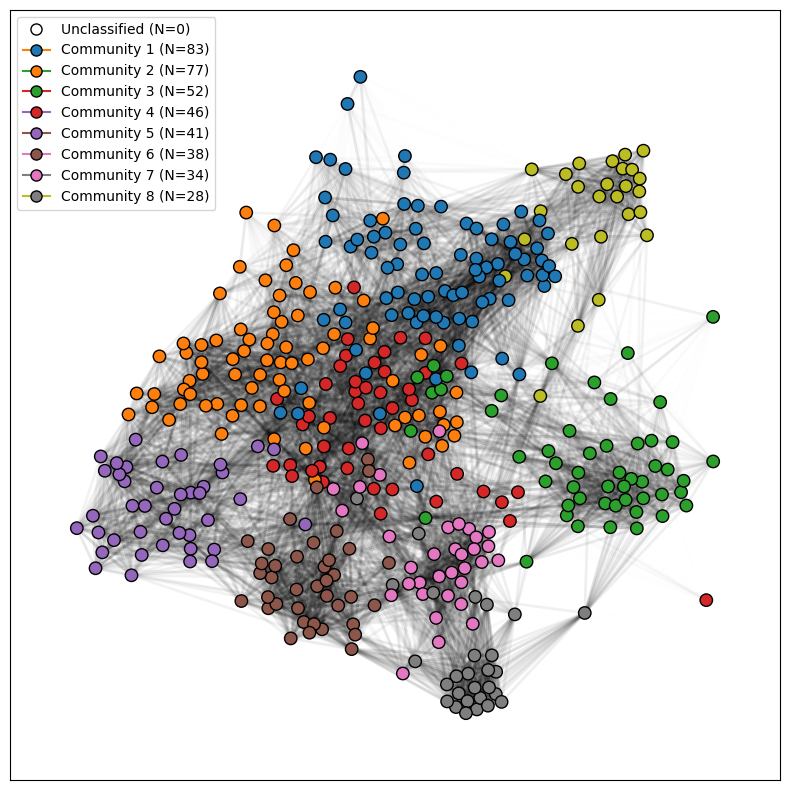

In [31]:
color_palette = ["white"] + sns.color_palette("tab10") + sns.color_palette("Set2")
pos = nx.spring_layout(G_population, seed=2, k=1 / np.sqrt(682) * 5, iterations=100)
fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)
edge_list = list(G_population.edges())
edge_alpha = [
        0.1 * G_population[u][v]["weight"] if G_population[u][v]["weight"] > 0 else 0 for u, v in edge_list
    ]
nx.draw_networkx_edges(G_population, pos, alpha=edge_alpha, width=2)
nx.draw_networkx_nodes(
            G_population, pos, node_size=80, 
            node_color=[color_palette[int(i)] for i in Community_ids], 
            edgecolors="black"
        )
handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[0],
        label=f"Unclassified (N={np.sum(Community_ids == 0)})",
        markerfacecolor=color_palette[0],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
]
for i in range(1, len(np.unique(Community_ids))):
    patch = Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[i + 1],
        label=f"Community {i} (N={np.sum(Community_ids == i)})",
        markerfacecolor=color_palette[i],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
    handles.append(patch)
ax.legend(handles=handles)
plt.show()

### Two step KNN graph

In [19]:
PopulationGraph_type = 'two_step_knn_graph'
para_dict = {
    'knn_k': 30,
}
G_population = construct_PopulationGraph(
    Gram_matrix,
    PopulationGraph_type,
    para_dict = para_dict,
)
Community_ids = detect_communities(G_population, size_smallest_cluster)

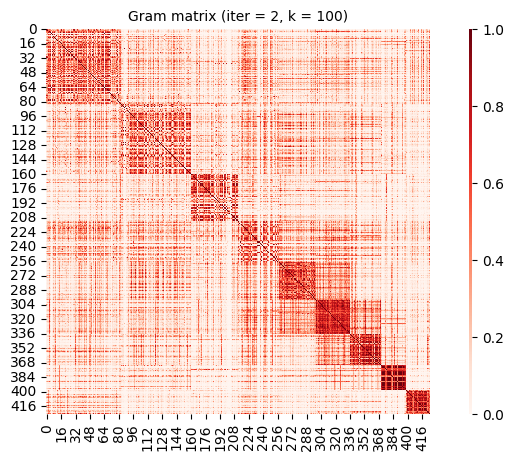

In [32]:
Patient_indices_sorted_by_community = np.argsort(Community_ids)
Gram_matrix_reorder = Gram_matrix[Patient_indices_sorted_by_community, :][:, Patient_indices_sorted_by_community]
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5.5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Gram_matrix_reorder,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
    )

ax.set_title(f"Gram matrix (iter = {iteration}, k = {PhenoGraph_k})", fontsize=10)
plt.show()

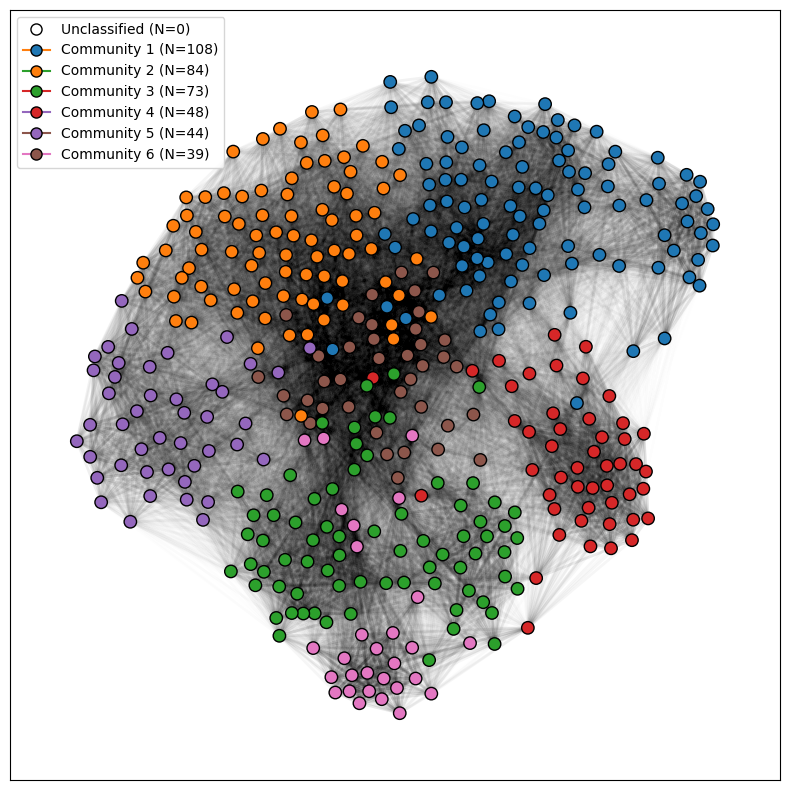

In [20]:
color_palette = ["white"] + sns.color_palette("tab10") + sns.color_palette("Set2")
pos = nx.spring_layout(G_population, seed=2, k=1 / np.sqrt(682) * 5, iterations=100)
fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)
edge_list = list(G_population.edges())
edge_alpha = [
        0.1 * G_population[u][v]["weight"] if G_population[u][v]["weight"] > 0 else 0 for u, v in edge_list
    ]
nx.draw_networkx_edges(G_population, pos, alpha=edge_alpha, width=2)
nx.draw_networkx_nodes(
            G_population, pos, node_size=80, 
            node_color=[color_palette[int(i)] for i in Community_ids], 
            edgecolors="black"
        )
handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[0],
        label=f"Unclassified (N={np.sum(Community_ids == 0)})",
        markerfacecolor=color_palette[0],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
]
for i in range(1, len(np.unique(Community_ids))):
    patch = Line2D(
        [0],
        [0],
        marker="o",
        color=color_palette[i + 1],
        label=f"Community {i} (N={np.sum(Community_ids == i)})",
        markerfacecolor=color_palette[i],
        markeredgecolor="black",
        markeredgewidth=1,
        markersize=8,
    )
    handles.append(patch)
ax.legend(handles=handles)
plt.show()